In [3]:
import sympy
def is_prime(num):

    return sympy.isprime(num)

def to_duodecimal(num):
    """
    Convert an integer to its duodecimal (base-12) representation.
    
    In base 12, the digits are: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, A (for 10), B (for 11).
    This function repeatedly divides the number by 12 and constructs the 
    duodecimal representation.
    """
    if num == 0:
        return "0"
    
    digits = "0123456789AB"  # Characters for each digit in base 12
    result = ""
    while num > 0:
        remainder = num % 12
        result = digits[remainder] + result
        num //= 12
    return result

def main():
    # Define the upper limit for n. This limit determines how many potential twin prime pairs we check.
    limit = 300  # You can adjust this limit as needed.
    
    # List to store the valid 6n values that lie between twin primes.
    twin_list = []
    
    # Iterate over n starting from 1 up to the specified limit.
    for n in range(1, limit + 1):
        # Calculate the candidate twin primes: (6n-1, 6n+1)
        p = 6 * n - 1
        q = 6 * n + 1
        
        # Check if both numbers are prime.
        if is_prime(p) and is_prime(q):
            twin_list.append(6 * n)
    
    # Print the list in a formatted manner.
    print("6n values (in decimal) and their duodecimal representations:")
    for value in twin_list:
        duodecimal_value = to_duodecimal(value)
        print(f"Decimal: {value:3d}  -->  Duodecimal: {duodecimal_value}")

if __name__ == "__main__":
    main()


6n values (in decimal) and their duodecimal representations:
Decimal:   6  -->  Duodecimal: 6
Decimal:  12  -->  Duodecimal: 10
Decimal:  18  -->  Duodecimal: 16
Decimal:  30  -->  Duodecimal: 26
Decimal:  42  -->  Duodecimal: 36
Decimal:  60  -->  Duodecimal: 50
Decimal:  72  -->  Duodecimal: 60
Decimal: 102  -->  Duodecimal: 86
Decimal: 108  -->  Duodecimal: 90
Decimal: 138  -->  Duodecimal: B6
Decimal: 150  -->  Duodecimal: 106
Decimal: 180  -->  Duodecimal: 130
Decimal: 192  -->  Duodecimal: 140
Decimal: 198  -->  Duodecimal: 146
Decimal: 228  -->  Duodecimal: 170
Decimal: 240  -->  Duodecimal: 180
Decimal: 270  -->  Duodecimal: 1A6
Decimal: 282  -->  Duodecimal: 1B6
Decimal: 312  -->  Duodecimal: 220
Decimal: 348  -->  Duodecimal: 250
Decimal: 420  -->  Duodecimal: 2B0
Decimal: 432  -->  Duodecimal: 300
Decimal: 462  -->  Duodecimal: 326
Decimal: 522  -->  Duodecimal: 376
Decimal: 570  -->  Duodecimal: 3B6
Decimal: 600  -->  Duodecimal: 420
Decimal: 618  -->  Duodecimal: 436
Decim

In [1]:
def maher_coloring(graph):
    """
    Implements Maher's graph coloring algorithm.

    Args:
        graph: A dictionary representing the graph where keys are vertices
               and values are lists of their neighbors.  Example:
               graph = {
                   'a': ['b', 'c', 'd'],
                   'b': ['a', 'c'],
                   'c': ['a', 'b', 'd', 'e'],
                   'd': ['a', 'c', 'e'],
                   'e': ['c', 'd']
               }

    Returns:
        A dictionary mapping vertices to their assigned colors (integers).
        Returns None if the input graph is invalid.
    """

    if not graph:  # Handle empty graph case
        return {}

    # 1. Create Adjacency Groups
    groups = []
    uncolored_vertices = set(graph.keys())

    while uncolored_vertices:
        v = uncolored_vertices.pop()  # Choose a vertex (arbitrary order)
        group = {v}
        if v in graph:  # Handle cases where a vertex might have no neighbors
             group.update(graph[v])
        
        groups.append(list(group))  # Convert set to list for consistent ordering within group
        uncolored_vertices -= group #remove the current group from the uncolored vertices


    # 2. Initialize Colors
    colors = {}  # Dictionary: vertex -> color
    permanent_colors = set()

    # 3. Coloring Process
    for group in groups:
        # Find the (first) "permanent" vertex in the group (already colored)
        permanent_vertex = None
        for v in group:
            if v in permanent_colors:
                permanent_vertex = v
                break  # Optimization:  Once found, no need to keep searching

        # If no permanent vertex, pick the first vertex in the group
        if permanent_vertex is None:
            permanent_vertex = group[0]

        # Assign a color to the permanent vertex (if not already colored)
        if permanent_vertex not in colors:
            colors[permanent_vertex] = 1
            permanent_colors.add(permanent_vertex)


        # Color other vertices in the group
        for v in group:
            if v not in colors:
                available_colors = set(range(1, len(graph) + 1))  # Potential colors

                # Remove colors used by neighbors
                if v in graph:
                  for neighbor in graph[v]:
                      if neighbor in colors:
                          available_colors.discard(colors[neighbor])

                # Assign the smallest available color
                colors[v] = min(available_colors)

                # Check to mark a vertex as permanently colored
                all_neighbors_permanent = True
                if v in graph:
                    for neighbor in graph[v]:
                        if neighbor not in permanent_colors:
                            all_neighbors_permanent = False
                            break
                if all_neighbors_permanent:
                    permanent_colors.add(v)


    return colors



# --- Test Cases ---
graph1 = {
    'a': ['b', 'c', 'd'],
    'b': ['a', 'c'],
    'c': ['a', 'b', 'd', 'e'],
    'd': ['a', 'c', 'e'],
    'e': ['c', 'd']
}
coloring1 = maher_coloring(graph1)
print(f"Graph 1 Coloring: {coloring1}")


graph2 = {
    'A': ['B', 'D', 'C', 'E'],
    'B': ['A', 'C'],
    'C': ['A', 'B', 'D', 'G', 'E'],
    'D': ['A', 'C', 'G'],
    'E': ['A', 'C', 'F', 'H', 'G'],
    'F': ['E', 'H'],
    'G': ['C','D', 'E', 'H'],
    'H': ['E', 'F','G']
}
coloring2 = maher_coloring(graph2)
print(f"Graph 2 Coloring: {coloring2}")

# Test case: Empty graph
graph_empty = {}
coloring_empty = maher_coloring(graph_empty)
print(f"Empty Graph Coloring: {coloring_empty}")  # Expected: {}

# Test case: Isolated vertices
graph_isolated = {'a': [], 'b': [], 'c': []}
coloring_isolated = maher_coloring(graph_isolated)
print(f"Isolated Vertices Graph Coloring: {coloring_isolated}")  # Expected: {'a': 1, 'b': 1, 'c': 1}

# Test case: Complete graph (K4)
graph_complete = {
    'a': ['b', 'c', 'd'],
    'b': ['a', 'c', 'd'],
    'c': ['a', 'b', 'd'],
    'd': ['a', 'b', 'c']
}
coloring_complete = maher_coloring(graph_complete)
print(f"Complete Graph (K4) Coloring: {coloring_complete}")

# Test case: Disconnected graph
graph_disconnected = {
    'a': ['b'],
    'b': ['a'],
    'c': ['d'],
    'd': ['c'],
    'e': []
}
coloring_disconnected = maher_coloring(graph_disconnected)
print(f"Disconnected Graph Coloring: {coloring_disconnected}")

def is_valid_coloring(graph, coloring):
    """Checks if a given coloring is a valid graph coloring."""
    if not coloring:  # Empty coloring is valid for empty graph
        return not graph

    for vertex, neighbors in graph.items():
        if vertex not in coloring:
            return False  # All vertices must be colored
        for neighbor in neighbors:
            if neighbor in coloring and coloring[vertex] == coloring[neighbor]:
                return False  # Adjacent vertices have the same color
    return True


# --- Validation ---
print(f"Graph 1 Valid: {is_valid_coloring(graph1, coloring1)}")
print(f"Graph 2 Valid: {is_valid_coloring(graph2, coloring2)}")
print(f"Empty Graph Valid: {is_valid_coloring(graph_empty, coloring_empty)}")
print(f"Isolated Graph Valid: {is_valid_coloring(graph_isolated, coloring_isolated)}")
print(f"Complete Graph Valid: {is_valid_coloring(graph_complete, coloring_complete)}")
print(f"Disconnected Graph Valid: {is_valid_coloring(graph_disconnected, coloring_disconnected)}")


# --- Complexity Analysis ---

# 1. Creating Adjacency Groups:
#    - The `while` loop iterates until all vertices are uncolored.  In the worst case,
#      each vertex forms its own group (e.g., a graph with no edges).  This takes O(|V|) time.
#    - Inside the loop, `group.update(graph[v])` takes O(degree(v)) time, where degree(v) is the
#      number of neighbors of v.  Summing over all vertices, this is O(|E|).
#    - The set difference operation `uncolored_vertices -= group` can take up to O(|V|) in the worst case.
#      Over all iterations, it could be up to O(|V|^2).

# 2. Initialization:  O(|V|) to initialize the dictionaries.

# 3. Coloring Process:
#   - The outer loop iterates over each group.  In the worst case, there are O(|V|) groups.
#    - The inner loop (finding the permanent vertex) iterates over the group, which could be up to O(|V|) vertices.
#    - Assigning a color to the permanent vertex is O(1).
#    - The loop to color other vertices in the group iterates over the group (up to O(|V|) vertices).
#        - Checking available colors: In the WORST CASE, checking `available_colors.discard(colors[neighbor])`, you iterate over the neighbors in the
#       `graph[v]` which is deg(v) in each inner iteration, and the inner iteration will loop for maximum |V| times.
#        - Finding the minimum available color is O(|V|) in the worst case (if all previous colors are taken).
#        - Checking all_neighbors_permanent can take O(degree(v)).

# Overall Complexity:

# - **Worst-Case Time Complexity:** O(|V|^3 + |E|).  The dominant factor is the nested loops within the coloring process and the creation of the adjacency group, with set operations adding a potential |v|^2 factor. The inner worst case, can reach the O(|V|^3) by making 3 nested loop.
# - **Space Complexity:** O(|V|) to store the `colors`, `permanent_colors`, and the temporary `groups` list.

# Key Improvements over Pure Brute Force:

# - **Reduced Search Space:**  By grouping vertices and prioritizing permanent colors, the algorithm avoids exploring many invalid color combinations.
# - **No Recursion:**  The iterative approach avoids the overhead of recursive function calls (which pure brute force would likely use).
# - Not Exponential, it is a polynomial time.

# Final Notes:
# - The algorithm's efficiency depends on the graph structure. For sparsely connected graphs, it will likely perform much better than the worst-case complexity suggests.
# - While the complexity is polynomial, it's still relatively high (O(|V|^3)).  For very large graphs, more sophisticated algorithms (like DSatur or Welsh-Powell) might be necessary. The main advantage is correctness and a structured, less redundant approach than pure brute force.

Graph 1 Coloring: {'e': 1, 'd': 2, 'c': 3, 'b': 1, 'a': 4}
Graph 2 Coloring: {'G': 1, 'D': 2, 'E': 2, 'H': 3, 'C': 3, 'A': 1, 'B': 2, 'F': 1}
Empty Graph Coloring: {}
Isolated Vertices Graph Coloring: {'b': 1, 'c': 1, 'a': 1}
Complete Graph (K4) Coloring: {'b': 1, 'd': 2, 'c': 3, 'a': 4}
Disconnected Graph Coloring: {'e': 1, 'd': 1, 'c': 2, 'b': 1, 'a': 2}
Graph 1 Valid: True
Graph 2 Valid: True
Empty Graph Valid: True
Isolated Graph Valid: True
Complete Graph Valid: True
Disconnected Graph Valid: True


In [2]:
import itertools

def is_safe(graph, vertex, color, coloring):
    """Checks if assigning a color to a vertex is safe (doesn't conflict with neighbors)."""
    if vertex not in graph:
        return True # Isolated vertex is always safe
    for neighbor in graph[vertex]:
        if neighbor in coloring and coloring[neighbor] == color:
            return False
    return True

def brute_force_coloring(graph):
    """
    Finds a proper graph coloring using a brute-force approach.
    Tries all possible color combinations until a valid one is found.

    Args:
        graph: A dictionary representing the graph (same format as maher_coloring).

    Returns:
        A dictionary mapping vertices to their assigned colors (integers),
        or None if no valid coloring is found (shouldn't happen for valid graphs).
    """
    vertices = list(graph.keys())
    num_vertices = len(vertices)
    
    # Iterate through all possible color assignments.  We'll use numbers 1 to num_vertices
    # as the possible colors.  We actually need to go up to num_vertices colors because
    # in the worst case (a complete graph), we need num_vertices colors.
    for num_colors in range(1, num_vertices + 1):
      for colors in itertools.product(range(1, num_colors + 1), repeat=num_vertices):
          coloring = dict(zip(vertices, colors))  # Create a coloring dictionary
          valid = True
          for vertex in vertices:
              if not is_safe(graph, vertex, coloring[vertex], coloring):
                  valid = False
                  break  # This coloring is invalid, move to the next one

          if valid:
              return coloring  # Found a valid coloring

    return None  # Should never reach here for a valid graph


def maher_coloring(graph):
    """
    Implements Maher's graph coloring algorithm.  (Same as before, included for completeness)
    """
    if not graph:
        return {}

    groups = []
    uncolored_vertices = set(graph.keys())

    while uncolored_vertices:
        v = uncolored_vertices.pop()
        group = {v}
        if v in graph:
             group.update(graph[v])
        
        groups.append(list(group))
        uncolored_vertices -= group

    colors = {}
    permanent_colors = set()

    for group in groups:
        permanent_vertex = None
        for v in group:
            if v in permanent_colors:
                permanent_vertex = v
                break

        if permanent_vertex is None:
            permanent_vertex = group[0]

        if permanent_vertex not in colors:
            colors[permanent_vertex] = 1
            permanent_colors.add(permanent_vertex)


        for v in group:
            if v not in colors:
                available_colors = set(range(1, len(graph) + 1))

                if v in graph:
                  for neighbor in graph[v]:
                      if neighbor in colors:
                          available_colors.discard(colors[neighbor])
                colors[v] = min(available_colors)

                all_neighbors_permanent = True
                if v in graph:
                    for neighbor in graph[v]:
                        if neighbor not in permanent_colors:
                            all_neighbors_permanent = False
                            break
                if all_neighbors_permanent:
                    permanent_colors.add(v)


    return colors


def is_valid_coloring(graph, coloring):
    """Checks if a given coloring is a valid graph coloring."""
    if not coloring:
        return not graph

    for vertex, neighbors in graph.items():
        if vertex not in coloring:
            return False
        for neighbor in neighbors:
            if neighbor in coloring and coloring[vertex] == coloring[neighbor]:
                return False
    return True


# --- Test Cases ---
test_graphs = [
    {
        'a': ['b', 'c', 'd'],
        'b': ['a', 'c'],
        'c': ['a', 'b', 'd', 'e'],
        'd': ['a', 'c', 'e'],
        'e': ['c', 'd']
    },
    {
        'A': ['B', 'D', 'C', 'E'],
        'B': ['A', 'C'],
        'C': ['A', 'B', 'D', 'G', 'E'],
        'D': ['A', 'C', 'G'],
        'E': ['A', 'C', 'F', 'H', 'G'],
        'F': ['E', 'H'],
        'G': ['C', 'D', 'E', 'H'],
        'H': ['E', 'F', 'G']
    },
    {},  # Empty graph
    {'a': [], 'b': [], 'c': []},  # Isolated vertices
    {
        'a': ['b', 'c', 'd'],
        'b': ['a', 'c', 'd'],
        'c': ['a', 'b', 'd'],
        'd': ['a', 'b', 'c']
    },  # Complete graph (K4)
    {
        'a': ['b'],
        'b': ['a'],
        'c': ['d'],
        'd': ['c'],
        'e': []
    },  # Disconnected graph
    # Add a larger, more complex graph
    {
    'a': ['b', 'c', 'f'],
    'b': ['a', 'c', 'd', 'e'],
    'c': ['a', 'b', 'f'],
    'd': ['b', 'e'],
    'e': ['b', 'd', 'f'],
    'f': ['a', 'c', 'e']
    }
]

for i, graph in enumerate(test_graphs):
    print(f"--- Graph {i + 1} ---")
    print(f"Graph: {graph}")

    maher_result = maher_coloring(graph)
    print(f"Maher's Coloring: {maher_result}, Valid: {is_valid_coloring(graph, maher_result)}")

    brute_force_result = brute_force_coloring(graph)
    print(f"Brute Force Coloring: {brute_force_result}, Valid: {is_valid_coloring(graph, brute_force_result)}")

    if maher_result and brute_force_result:
      maher_colors_used = len(set(maher_result.values()))
      brute_force_colors_used = len(set(brute_force_result.values()))
      print(f"Number of colors (Maher): {maher_colors_used}")
      print(f"Number of colors (Brute Force): {brute_force_colors_used}")  # Output number of colors


import time

# --- Time Comparison ---
print("\n--- Time Comparison ---")

#Use a slightly larger graph for more meaningful timing
larger_graph = {
    'a': ['b', 'c', 'd', 'e'],
    'b': ['a', 'c', 'f', 'g'],
    'c': ['a', 'b', 'd', 'h'],
    'd': ['a', 'c', 'e', 'i'],
    'e': ['a', 'd', 'f', 'j'],
    'f': ['b', 'e', 'g', 'k'],
    'g': ['b', 'f', 'h', 'l'],
    'h': ['c', 'g', 'i', 'm'],
    'i': ['d', 'h', 'j', 'n'],
    'j': ['e', 'i', 'k', 'o'],
    'k': ['f', 'j', 'l', 'p'],
    'l': ['g', 'k', 'm', 'q'],
    'm': ['h', 'l', 'n', 'r'],
    'n': ['i', 'm', 'o', 's'],
    'o': ['j', 'n', 'p', 't'],
    'p': ['k', 'o', 'q', 'u'],
    'q': ['l', 'p', 'r', 'v'],
    'r': ['m', 'q', 's', 'w'],
    's': ['n', 'r', 't', 'x'],
    't': ['o', 's', 'u', 'y'],
    'u': ['p', 't', 'v', 'z'],
    'v': ['q', 'u', 'w'],
    'w': ['r', 'v', 'x'],
    'x': ['s', 'w', 'y'],
    'y': ['t', 'x', 'z'],
    'z': ['u', 'y']
}

start_time = time.time()
maher_coloring(larger_graph)
end_time = time.time()
maher_time = end_time - start_time
print(f"Maher's Algorithm Time: {maher_time:.6f} seconds")


#Be very careful running brute_force on larger graphs - it can take a VERY long time!
start_time = time.time()
brute_force_coloring(larger_graph)  # Comment out if it takes too long
end_time = time.time()
brute_force_time = end_time - start_time
print(f"Brute Force Algorithm Time: {brute_force_time:.6f} seconds") # Comment out if it takes too long

--- Graph 1 ---
Graph: {'a': ['b', 'c', 'd'], 'b': ['a', 'c'], 'c': ['a', 'b', 'd', 'e'], 'd': ['a', 'c', 'e'], 'e': ['c', 'd']}
Maher's Coloring: {'e': 1, 'd': 2, 'c': 3, 'b': 1, 'a': 4}, Valid: True
Brute Force Coloring: {'a': 1, 'b': 2, 'c': 3, 'd': 2, 'e': 1}, Valid: True
Number of colors (Maher): 4
Number of colors (Brute Force): 3
--- Graph 2 ---
Graph: {'A': ['B', 'D', 'C', 'E'], 'B': ['A', 'C'], 'C': ['A', 'B', 'D', 'G', 'E'], 'D': ['A', 'C', 'G'], 'E': ['A', 'C', 'F', 'H', 'G'], 'F': ['E', 'H'], 'G': ['C', 'D', 'E', 'H'], 'H': ['E', 'F', 'G']}
Maher's Coloring: {'G': 1, 'D': 2, 'E': 2, 'H': 3, 'C': 3, 'A': 1, 'B': 2, 'F': 1}, Valid: True
Brute Force Coloring: {'A': 1, 'B': 2, 'C': 3, 'D': 2, 'E': 2, 'F': 1, 'G': 1, 'H': 3}, Valid: True
Number of colors (Maher): 3
Number of colors (Brute Force): 3
--- Graph 3 ---
Graph: {}
Maher's Coloring: {}, Valid: True
Brute Force Coloring: None, Valid: True
--- Graph 4 ---
Graph: {'a': [], 'b': [], 'c': []}
Maher's Coloring: {'b': 1, 'c': 

KeyboardInterrupt: 

In [3]:
import random
import itertools
import time

def maher_coloring(graph):
    """
    Implements Maher's graph coloring algorithm (same as before, but extracted).
    """
    if not graph:
        return {}

    groups = []
    uncolored_vertices = set(graph.keys())

    while uncolored_vertices:
        v = uncolored_vertices.pop()
        group = {v}
        if v in graph:
             group.update(graph[v])
        groups.append(list(group))
        uncolored_vertices -= group

    colors = {}
    permanent_colors = set()

    for group in groups:
        permanent_vertex = None
        for v in group:
            if v in permanent_colors:
                permanent_vertex = v
                break

        if permanent_vertex is None:
            permanent_vertex = group[0]

        if permanent_vertex not in colors:
            colors[permanent_vertex] = 1
            permanent_colors.add(permanent_vertex)


        for v in group:
            if v not in colors:
                available_colors = set(range(1, len(graph) + 1))

                if v in graph:
                  for neighbor in graph[v]:
                      if neighbor in colors:
                          available_colors.discard(colors[neighbor])
                colors[v] = min(available_colors)

                all_neighbors_permanent = True
                if v in graph:
                    for neighbor in graph[v]:
                        if neighbor not in permanent_colors:
                            all_neighbors_permanent = False
                            break
                if all_neighbors_permanent:
                    permanent_colors.add(v)
    return colors


def is_valid_coloring(graph, coloring):
    """Checks if a given coloring is a valid graph coloring."""
    if not coloring:
        return not graph

    for vertex, neighbors in graph.items():
        if vertex not in coloring:
            return False
        for neighbor in neighbors:
            if neighbor in coloring and coloring[vertex] == coloring[neighbor]:
                return False
    return True


def improve_coloring(graph, initial_coloring, max_iterations=1000):
    """
    Attempts to improve a graph coloring using a simple local search.

    Args:
        graph: The graph (dictionary representation).
        initial_coloring: A valid coloring (dictionary).
        max_iterations: Maximum number of iterations to try.

    Returns:
        An improved coloring (dictionary) or the original coloring if no
        improvement is found.
    """

    current_coloring = initial_coloring.copy()
    current_colors_used = len(set(current_coloring.values()))

    for _ in range(max_iterations):
        # Choose a random vertex
        vertex = random.choice(list(graph.keys()))

        # Find available colors for this vertex
        available_colors = set(range(1, len(graph) + 1))
        if vertex in graph:
            for neighbor in graph[vertex]:
                if neighbor in current_coloring:
                    available_colors.discard(current_coloring[neighbor])

        # If there's a smaller available color, try changing it
        if available_colors:
            new_color = min(available_colors)
            if new_color < current_coloring[vertex]:
                original_color = current_coloring[vertex]
                current_coloring[vertex] = new_color
                new_colors_used = len(set(current_coloring.values()))

                # If the new coloring is valid and uses fewer colors, keep it
                if is_valid_coloring(graph, current_coloring) and new_colors_used <= current_colors_used:
                    current_colors_used = new_colors_used
                else:
                    # Revert to the original color
                    current_coloring[vertex] = original_color
    return current_coloring

def dsatur_coloring(graph):
    """
    Implements the DSatur graph coloring algorithm.
    """
    if not graph:
        return {}

    colors = {}
    uncolored = set(graph.keys())

    # Calculate initial degrees and saturations
    degrees = {v: len(graph[v]) if v in graph else 0 for v in graph}
    saturations = {v: 0 for v in graph}  # Number of differently colored neighbors

    while uncolored:
        # Find vertex with highest saturation degree (and highest degree for ties)
        max_saturation = -1
        max_degree = -1
        best_vertex = None
        for v in uncolored:
            if saturations[v] > max_saturation:
                max_saturation = saturations[v]
                max_degree = degrees[v]
                best_vertex = v
            elif saturations[v] == max_saturation and degrees[v] > max_degree:
                max_degree = degrees[v]
                best_vertex = v

        # Find the smallest available color for the best vertex
        available_colors = set(range(1, len(graph) + 1))
        if best_vertex in graph:
            for neighbor in graph[best_vertex]:
                if neighbor in colors:
                    available_colors.discard(colors[neighbor])
        colors[best_vertex] = min(available_colors)

        # Update saturations of uncolored neighbors
        if best_vertex in graph:
            for neighbor in graph[best_vertex]:
                if neighbor in uncolored:
                    # Recalculate saturation for the neighbor (more accurate)
                    neighbor_colors = set()
                    if neighbor in graph:
                        for n in graph[neighbor]:
                            if n in colors:
                                neighbor_colors.add(colors[n])
                    saturations[neighbor] = len(neighbor_colors)

        uncolored.remove(best_vertex)
    return colors

# --- Test Cases --- (Same as before, but now using the functions)
test_graphs = [
    {
        'a': ['b', 'c', 'd'],
        'b': ['a', 'c'],
        'c': ['a', 'b', 'd', 'e'],
        'd': ['a', 'c', 'e'],
        'e': ['c', 'd']
    },
    {
        'A': ['B', 'D', 'C', 'E'],
        'B': ['A', 'C'],
        'C': ['A', 'B', 'D', 'G', 'E'],
        'D': ['A', 'C', 'G'],
        'E': ['A', 'C', 'F', 'H', 'G'],
        'F': ['E', 'H'],
        'G': ['C', 'D', 'E', 'H'],
        'H': ['E', 'F', 'G']
    },
    {},
    {'a': [], 'b': [], 'c': []},
    {
        'a': ['b', 'c', 'd'],
        'b': ['a', 'c', 'd'],
        'c': ['a', 'b', 'd'],
        'd': ['a', 'b', 'c']
    },
    {
        'a': ['b'],
        'b': ['a'],
        'c': ['d'],
        'd': ['c'],
        'e': []
    },
     {
    'a': ['b', 'c', 'f'],
    'b': ['a', 'c', 'd', 'e'],
    'c': ['a', 'b', 'f'],
    'd': ['b', 'e'],
    'e': ['b', 'd', 'f'],
    'f': ['a', 'c', 'e']
    }
]

for i, graph in enumerate(test_graphs):
    print(f"--- Graph {i + 1} ---")
    maher_result = maher_coloring(graph)
    maher_colors = len(set(maher_result.values()))
    print(f"Maher: Colors={maher_colors}, {maher_result}")

    improved_result = improve_coloring(graph, maher_result)
    improved_colors = len(set(improved_result.values()))
    print(f"Improved: Colors={improved_colors}, {improved_result}")


    dsatur_result = dsatur_coloring(graph)
    dsatur_colors = len(set(dsatur_result.values()))
    print(f"DSatur: Colors={dsatur_colors}, {dsatur_result}")


# --- Larger Graph for Time and Color Comparison ---
larger_graph = {
    'a': ['b', 'c', 'd', 'e'],
    'b': ['a', 'c', 'f', 'g'],
    'c': ['a', 'b', 'd', 'h'],
    'd': ['a', 'c', 'e', 'i'],
    'e': ['a', 'd', 'f', 'j'],
    'f': ['b', 'e', 'g', 'k'],
    'g': ['b', 'f', 'h', 'l'],
    'h': ['c', 'g', 'i', 'm'],
    'i': ['d', 'h', 'j', 'n'],
    'j': ['e', 'i', 'k', 'o'],
    'k': ['f', 'j', 'l', 'p'],
    'l': ['g', 'k', 'm', 'q'],
    'm': ['h', 'l', 'n', 'r'],
    'n': ['i', 'm', 'o', 's'],
    'o': ['j', 'n', 'p', 't'],
    'p': ['k', 'o', 'q', 'u'],
    'q': ['l', 'p', 'r', 'v'],
    'r': ['m', 'q', 's', 'w'],
    's': ['n', 'r', 't', 'x'],
    't': ['o', 's', 'u', 'y'],
    'u': ['p', 't', 'v', 'z'],
    'v': ['q', 'u', 'w'],
    'w': ['r', 'v', 'x'],
    'x': ['s', 'w', 'y'],
    'y': ['t', 'x', 'z'],
    'z': ['u', 'y']
}

# Maher's Algorithm
start_time = time.time()
maher_result = maher_coloring(larger_graph)
end_time = time.time()
maher_time = end_time - start_time
maher_colors = len(set(maher_result.values()))

# Improved Maher's with Local Search
start_time = time.time()
improved_result = improve_coloring(larger_graph, maher_result)
end_time = time.time()
improved_time = end_time - start_time
improved_colors = len(set(improved_result.values()))

# DSatur
start_time = time.time()
dsatur_result = dsatur_coloring(larger_graph)
end_time = time.time()
dsatur_time = end_time - start_time
dsatur_colors = len(set(dsatur_result.values()))



print("\n--- Larger Graph Results ---")
print(f"Maher: Colors={maher_colors}, Time={maher_time:.6f}s")
print(f"Improved Maher: Colors={improved_colors}, Time={improved_time:.6f}s")
print(f"DSatur: Colors={dsatur_colors}, Time={dsatur_time:.6f}s")

--- Graph 1 ---
Maher: Colors=4, {'e': 1, 'd': 2, 'c': 3, 'b': 1, 'a': 4}
Improved: Colors=4, {'e': 1, 'd': 2, 'c': 3, 'b': 1, 'a': 4}
DSatur: Colors=3, {'c': 1, 'a': 2, 'd': 3, 'e': 2, 'b': 3}
--- Graph 2 ---
Maher: Colors=3, {'G': 1, 'D': 2, 'E': 2, 'H': 3, 'C': 3, 'A': 1, 'B': 2, 'F': 1}
Improved: Colors=3, {'G': 1, 'D': 2, 'E': 2, 'H': 3, 'C': 3, 'A': 1, 'B': 2, 'F': 1}
DSatur: Colors=3, {'E': 1, 'C': 2, 'G': 3, 'A': 3, 'D': 1, 'H': 2, 'B': 1, 'F': 3}
--- Graph 3 ---
Maher: Colors=0, {}


IndexError: Cannot choose from an empty sequence

In [4]:
def find_dominant_set(adj_list):
    vertex_cover = set()
    vector_matrix = {}

    # Initialize the vector matrix
    for vertex in adj_list:
        vector_matrix[vertex] = len(adj_list[vertex])

    while any(vector_matrix.values()):
        # Choose the vertex with the highest degree
        current_vertex = max(vector_matrix, key=vector_matrix.get)

        # Set the degree of the current vertex to 0
        vector_matrix[current_vertex] = 0

        # Add the current vertex to the vertex cover
        vertex_cover.add(current_vertex)

        # Update sums for neighbors
        for neighbor in adj_list[current_vertex]:
            if neighbor not in vertex_cover:
                shared_neighbors = set(adj_list[current_vertex]) & set(adj_list[neighbor])
                reduction_factor = len(shared_neighbors) + 1
                vector_matrix[neighbor] -= reduction_factor

    return vertex_cover
def find_vertex_cover(adj_list):
    vertex_cover = set()
    vector_matrix = {}

    # Initialize the vector matrix
    for vertex in adj_list:
        vector_matrix[vertex] = len(adj_list[vertex])

    while any(vector_matrix.values()):
        # Choose the vertex with the highest degree and a sum > 0
        current_vertex = max((v for v, degree in vector_matrix.items() if degree > 0), key=vector_matrix.get, default=None)

        if current_vertex is None:
            break  # All remaining vertices have a sum of 0, exit the loop

        # Set the degree of the current vertex to 0
        vector_matrix[current_vertex] = 0

        # Add the current vertex to the vertex cover
        vertex_cover.add(current_vertex)

        # Update sums for neighbors
        for neighbor in adj_list[current_vertex]:
            if neighbor not in vertex_cover:
                shared_neighbors = set(adj_list[current_vertex]) & set(adj_list[neighbor])
                reduction_factor = len(shared_neighbors) + 1
                vector_matrix[neighbor] -= reduction_factor

    return vertex_cover

# Example usage:

adj_list4 = {
    'A': ['E','H'],
    'B': [ 'C', 'F'],
    'C': [ 'B', 'D', 'E', 'F'],
    'D': [ 'C', 'E',],
    'E': [ 'A','C', 'D', 'G', 'H'],
    'F': ['B', 'C', 'G'],
    'G': ['E', 'F', 'H'],
    'H': ['E', 'G','A']
}
adj_list = {
    'A': ['B', 'C'],
    'B': ['A', 'B','C'],
    'C': ['A','B','D','E','F'],
    'D': [ 'C'],
    'E':['C'],
    'F':['C']
}

# Example usage:
adj_list = {
    'A': ['B', 'C'],
    'B': ['A', 'B','C'],
    'C': ['A','B','D','E','F'],
    'D': [ 'C'],
    'E':['C'],
    'F':['C']
}
adj_list2 = {
    'A': ['B', 'C', 'D', 'E'],
    'B': ['A', 'C'],
    'C': ['A', 'B', 'D', 'E'],
    'D': ['A', 'C', 'E'],
    'E': ['A', 'C', 'D'],
    
}

def find_vertex_cover(adj_list):
    vertex_cover = set()
    vector_matrix = {}

    # Initialize the vector matrix
    for vertex in adj_list:
        vector_matrix[vertex] = len(adj_list[vertex])

    while any(vector_matrix.values()):
        # Choose the vertex with the highest degree and a sum > 0
        current_vertex = max((v for v, degree in vector_matrix.items() if degree > 0), key=vector_matrix.get, default=None)

        if current_vertex is None:
            break  # All remaining vertices have a sum of 0, exit the loop

        # Set the degree of the current vertex to 0
        vector_matrix[current_vertex] = 0

        # Add the current vertex to the vertex cover
        vertex_cover.add(current_vertex)

        # Update sums for neighbors
        for neighbor in adj_list[current_vertex]:
            if neighbor not in vertex_cover:
                shared_neighbors = set(adj_list[current_vertex]) & set(adj_list[neighbor])
                #reduction_factor = len(shared_neighbors) + 1
                vector_matrix[neighbor] -= 1

    return vertex_cover

# Example usage:

adj_list3 = {
    'A': ['B', 'D', 'E'],
    'B': ['A', 'C', 'F'],
    'C': [ 'B', 'D', 'E', 'F'],
    'D': ['A', 'C', 'E',],
    'E': ['A', 'C', 'D', 'G', 'H'],
    'F': ['B', 'C', 'G'],
    'G': ['E', 'F', 'H'],
    'H': ['E', 'G']
}

vertex_cover = find_vertex_cover(adj_list4)
print("Vertex Cover:", vertex_cover)

vertex_cover = find_dominant_set(adj_list4)
print("dominant set", vertex_cover)

def generate_magic_cube_4x4():
    n = 4
    magic_sum = n * (n**2 + 1) // 2

    # Initialize a 4x4 matrix with zeros
    magic_cube = [[0] * n for _ in range(n)]

    # Start with the middle of the top row
    row, col = 0, n // 2

    # Fill in the magic cube
    for num in range(1, n**2 + 1):
        magic_cube[row][col] = num

        # Calculate the next position
        new_row, new_col = (row - 1) % n, (col + 1) % n

        # If the next position is already filled or out of bounds, move down
        if magic_cube[new_row][new_col] != 0:
            row = (row + 1) % n
        else:
            row, col = new_row, new_col

    return magic_cube

def print_magic_cube(magic_cube):
    for row in magic_cube:
        print(" ".join(map(str, row)))

# Generate and print a 4x4 magic cube
magic_cube = generate_magic_cube_4x4()
print_magic_cube(magic_cube)
def generate_magic_cube_adjacency_matrix():
    n = 4
    magic_sum = n * (n**2 + 1) // 2

    # Initialize a 4x4 matrix with zeros
    magic_cube = [[0] * n for _ in range(n)]

    # Start with the middle of the top row
    row, col = 0, n // 2

    # Fill in the magic cube
    for num in range(1, n**2 + 1):
        magic_cube[row][col] = num

        # Calculate the next position
        new_row, new_col = (row - 1) % n, (col + 1) % n

        # If the next position is already filled or out of bounds, move down
        if magic_cube[new_row][new_col] != 0:
            row = (row + 1) % n
        else:
            row, col = new_row, new_col

    # Create an adjacency matrix for the graph
    adjacency_matrix = [[0] * n for _ in range(n)]

    for i in range(n):
        for j in range(n):
            # Assign weights to edges based on the values in the magic cube
            weight = magic_cube[i][j]
            
            # Create self-loops with the same weight
            adjacency_matrix[i][j] = weight

    return adjacency_matrix

# Function to print the adjacency matrix
def print_adjacency_matrix(adjacency_matrix):
    for row in adjacency_matrix:
        print(" ".join(map(str, row)))

# Generate and print the adjacency matrix for the magic cube
adj_matrix = generate_magic_cube_adjacency_matrix()
print_adjacency_matrix(adj_matrix)
print(adj_matrix)

import random
def is_isomorphic_with_oracle(P, G, H):
    response = P.ask_isomorphic(G, H)  # Ask P if G and H are isomorphic

    if response == "yes":
        # Attempt to construct an isomorphism using P as subroutine
        for u in range(len(G)):
            for v in range(len(H)):
                # Modify the graphs to make them distinctive
                G_modified = modify_graph(G, u)
                H_modified = modify_graph(H, v)

                # Ask P if the modified graphs are isomorphic
                modified_response = P.ask_isomorphic(G_modified, H_modified)

                if modified_response == "yes":
                    # The isomorphism was found and can be verified
                    return True

        # If no isomorphism was found, return False
        return False

    elif response == "no":
        # Perform 100 random tests to check for non-isomorphism
        for _ in range(100):
            graph_to_test = random.choice([G, H])
            if graph_to_test==G:
              graph_same=H
            else:
              graph_same=G
            permuted_graph = permute_vertices(graph_to_test)
            response = P.ask_isomorphic(graph_same, permuted_graph)

            if response == "yes":
                # P contradicts itself; judge P as invalid
                return "invalid_program"

        # If no contradiction was found, return "no"
        return "no"

# Function to modify a graph to make it distinctive
def modify_graph(graph, vertex):
    # Modify the graph by changing a small local part
    modified_graph = graph.copy()
    modified_graph[vertex][vertex] = 1 if modified_graph[vertex][vertex] == 0 else 0
    return modified_graph

# Function to randomly permute the vertices of a graph
def permute_vertices(graph):
    # Generate a random permutation of vertices
    num_vertices = len(graph)
    permutation = list(range(num_vertices))
    random.shuffle(permutation)

    # Create a new graph with permuted vertices
    permuted_graph = [[0] * num_vertices for _ in range(num_vertices)]
    for i in range(num_vertices):
        for j in range(num_vertices):
            permuted_graph[permutation[i]][permutation[j]] = graph[i][j]

    return permuted_graph

# Example usage:
class OracleP:
    # Replace this with an actual oracle P implementation
  def ask_isomorphic(self,graph1, graph2):
    print(graph1)
    print(graph2)
  
    # Check if the number of vertices in both graphs is the same
    if len(graph1) != len(graph2):
        return "no"

    # Function to calculate the sum of elements in a matrix
    def matrix_sum(matrix):
        return sum(sum(row) for row in matrix)

    # Calculate the sums of rows, columns, and diagonals for both graphs
    sum_rows1 = [sum(row) for row in graph1]
    sum_cols1 = [sum(graph1[i][j] for i in range(len(graph1))) for j in range(len(graph1))]
    diagonal_sum1 = sum(graph1[i][i] for i in range(len(graph1)))

    sum_rows2 = [sum(row) for row in graph2]
    sum_cols2 = [sum(graph2[i][j] for i in range(len(graph2))) for j in range(len(graph2))]
    diagonal_sum2 = sum(graph2[i][i] for i in range(len(graph2)))
   
    # Check if the sums match for both graphs
    if (
        sorted(sum_rows1) == sorted(sum_rows2) and
        sorted(sum_cols1) == sorted(sum_cols2) and
        diagonal_sum1 == diagonal_sum2
    ):
        # Now, find and map identical vertices, sorted by column values
        vertex_mapping = {}  # Dictionary to store mappings
        multiple_identical = {}  # Dictionary to store vertices with multiple identical matches
        unmatched_vertices = []  # List to store unmatched vertices

        for i in range(len(graph1)):
            # Sort the column values for graph1
            sorted_col1 = sorted([graph1[k][i] for k in range(len(graph1))])
            sorted_rows= sorted([sum(row) for row in graph1])
            identical_matches = []  # List to store identical matches for the current vertex

            for j in range(len(graph2)):
                # Sort the column values for graph2
                sorted_rows2=sorted([sum(row) for row in graph2])
                sorted_col2 = sorted([graph2[k][j] for k in range(len(graph2))])
                if (
                    sum(graph1[i]) == sum(graph2[j]) and
                    sorted_col1 == sorted_col2 and
                     # all(sum(graph1[neighbor]) == sum(graph2[neighbor2])
                        #for neighbor, neighbor2 in zip(range(len(graph1)), range(len(graph2)))
                        #if graph1[i][neighbor] == graph2[j][neighbor2])and
                        
                    diagonal_sum1==diagonal_sum2
                ):
                    # Found an identical vertex
                    if graph1[i][i] == graph2[j][j]:
                        identical_matches.append(j)
                    elif graph1[i][i] == 0 and graph2[j][j] == 0:
                        identical_matches.append(j)

            if len(identical_matches) > 1:
                # Vertex has multiple identical matches
                multiple_identical[i] = identical_matches
            elif len(identical_matches) == 1:
                # Vertex has a single identical match
                vertex_mapping[i] = identical_matches[0]
            else:
                # Vertex has no identical matches
                unmatched_vertices.append(i)

        if unmatched_vertices:
            # At least one vertex from graph1 cannot be mapped to graph2
            return "no"
        
        print("The graphs are isomorphic.")
        print("Vertex Mapping:")
        for vertex1, vertex2 in vertex_mapping.items():
         print(f"Vertex {vertex1} in Graph 1 is identical to Vertex {vertex2} in Graph 2.")

        if multiple_identical:
         print("Vertices with Multiple Identical Matches in Graph 2:")
         for vertex, matches in multiple_identical.items():
            print(f"Vertex {vertex} in Graph 1 has multiple identical matches in Graph 2 at vertices {matches}.")
        #else:
         #print("The graphs are not isomorphic.")


        return "yes"

    return "no"
# Create graphs G and H (replace these with your actual graphs)
G = [[1, 1, 1], [1, 1, 1], [1, 1, 1]]
H = [[1, 1, 1], [1, 1, 1], [1, 1,1 ]]
graph1 = [
    [1, 1, 1, 0, 1],
    [1, 0, 0, 1, 1],
    [1, 0, 0, 0, 1],
    [0, 1, 0, 0, 1],
    [1, 1, 1, 1, 0]
]
graph2 = [
    [0, 1, 1, 1, 1],
    [1, 0, 1, 0, 0],
    [1, 1, 1, 0, 1],
    [1, 0, 0, 0, 1],
    [1, 0, 1, 1, 0]
]
graph1= [[16, 2, 3, 13],
         [5, 11, 10, 8],
         [9, 7,  6, 12],
         [4, 14, 15, 1]]
graph2=[[11,10,8,5],
[7,6,12,9],
[14,15,1,4],
[2,3,13,16]]

# Create an instance of the OracleP class
oracle = OracleP()

# Test if G and H are isomorphic
result = is_isomorphic_with_oracle(oracle, graph1, graph2)

if result == "invalid_program":
    print("Oracle P is invalid.")
else :
    print("G and H are isomorphic?",result)

def are_vertices_isomorphic(graph1, graph2, i, j):
    # Check if vertex i in graph1 has the same neighbors as vertex j in graph2
    neighbors_i = [idx for idx, val in enumerate(graph1[i]) if val == 1]
    neighbors_j = [idx for idx, val in enumerate(graph2[j]) if val == 1]

    if sorted((neighbors_i)) != sorted((neighbors_j)):
        print(1)
        return False

    # Check if the neighbors of vertex i in graph1 have the same edge degree as the neighbors of vertex j in graph2
    for neighbor_i in neighbors_i:
        degree_i = sum(graph1[neighbor_i])
        degree_j = sum(graph2[neighbors_j.index(neighbor_i)])
        if degree_i != degree_j:
            return False

    return True

# Example graphs (adjacency matrices represented as lists of lists)
graph1 = [
    [0, 1, 1, 1],
    [1, 0, 1, 1],
    [1, 1, 0, 1],
    [1, 1, 1, 0]
]

graph2 = [
    [0, 1, 1, 1],
    [1, 0, 1, 1],
    [1, 1, 0, 1],
    [1, 1, 1, 0]
]

# Example vertices i and j
i = 1
j = 3

if are_vertices_isomorphic(graph1, graph1, i, j):
    print(f"Vertex {i} in Graph 1 is isomorphic to Vertex {j} in Graph 2.")
else:
    print(f"Vertex {i} in Graph 1 is not isomorphic to Vertex {j} in Graph 2.")

def are_neighbors_equal(graph1, graph2, i, j):
    # Assuming graph1 and graph2 are adjacency matrices as lists of lists
    neighbors_i_graph1 = [index for index, value in enumerate(graph1[i]) if value == 1]
    neighbors_j_graph1 = [index for index, value in enumerate(graph1[j]) if value == 1]

    neighbors_i_graph2 = [index for index, value in enumerate(graph2[i]) if value == 1]
    neighbors_j_graph2 = [index for index, value in enumerate(graph2[j]) if value == 1]

    if len(neighbors_i_graph1) != len(neighbors_i_graph2):
        return False

    if len(neighbors_j_graph1) != len(neighbors_j_graph2):
        return False

    for neighbor_i in neighbors_i_graph1:
        if neighbor_i not in neighbors_i_graph2:
            return False
        if sum(graph1[neighbor_i]) != sum(graph2[neighbor_i]):
            return False

    for neighbor_j in neighbors_j_graph1:
        if neighbor_j not in neighbors_j_graph2:
            return False
        if sum(graph1[neighbor_j]) != sum(graph2[neighbor_j]):
            return False

    return True

# Example usage:
graph1 = [[0, 1, 1, 0],
          [1, 0, 1, 1],
          [1, 1, 0, 1],
          [0, 1, 1, 0]]

graph2 = [[0, 1, 1, 0],
          [1, 0, 1, 0],
          [1, 1, 0, 1],
          [0, 1, 1, 0]]

i = 1
j = 1

result = are_neighbors_equal(graph1, graph2, i, j)
print(result)  # True if the neighbors and edge degrees are the same, False otherwise
# Sample graphs represented as dictionaries of adjacency lists
graph1 = {1: [2], 2: [1, 3], 3: [2, 4], 4: [3, 5], 5: [4]}
graph2 = {10: [20], 20: [10, 30], 30: [20, 40], 40: [30, 50], 50: [40]}

# Function to compare vertices at position (i, j)
def compare_vertices(graph1, graph2, i, j):
    # Get the vertices at position (i, j) in both graphs
    vertex1 = list(graph1.keys())[i]
    vertex2 = list(graph2.keys())[j]

    # Check if they have the same neighbors count
    neighbors_count1 = len(graph1[vertex1])
    neighbors_count2 = len(graph2[vertex2])

    if neighbors_count1 != neighbors_count2:
        return False

    # Check if their neighbors have the same neighbors
    neighbors1 = graph1[vertex1]
    neighbors2 = graph2[vertex2]

    for neighbor1, neighbor2 in zip(neighbors1, neighbors2):
        neighbors_of_neighbor1 = set(graph1.get(neighbor1, []))
        neighbors_of_neighbor2 = set(graph2.get(neighbor2, []))

        if neighbors_of_neighbor1 != neighbors_of_neighbor2:
            return False

    return True

# Sort the list of comparisons for easier matching
comparisons = [(i, j) for i in range(len(graph1)) for j in range(len(graph2))]
comparisons.sort(key=lambda x: (len(graph1[list(graph1.keys())[x[0]]]), len(graph2[list(graph2.keys())[x[1]]])))

# Now, let's perform the comparisons
for i, j in comparisons:
    if compare_vertices(graph1, graph2, i, j):
        print(f"Vertices ({list(graph1.keys())[i]}, {list(graph2.keys())[j]}) match!")
def compare_vertices(graph1, graph2, i, j):
    # Get the neighbors of vertex (i, j) in the first graph
    neighbors1 = [n for n in graph1[i] if n != j]
    
    # Get the neighbors of vertex (i, j) in the second graph
    neighbors2 = [n for n in graph2[i] if n != j]
    
    # Sort the neighbor lists for easier comparison
    neighbors1.sort()
    neighbors2.sort()
    
    # Check if the number of neighbors is the same
    if len(neighbors1) != len(neighbors2):
        return False
    
    # Check if the neighbors have the same neighbors count
    for n1, n2 in zip(neighbors1, neighbors2):
        n1_neighbors = [n for n in graph1[n1] if n != i]
        n2_neighbors = [n for n in graph2[n2] if n != i]
        
        n1_neighbors.sort()
        n2_neighbors.sort()
        
        if len(n1_neighbors) != len(n2_neighbors):
            return False
        
    return True
#def compare_vertices(graph1, graph2, i, j):
    # Get the neighbors of vertex (i, j) in the first graph
    neighbors1 = [n for n in graph1[i] ]
    
    # Get the neighbors of vertex (i, j) in the second graph
    neighbors2 = [n for n in graph2[i]]
    
    # Sort the neighbor lists for easier comparison
    neighbors1.sort()
    neighbors2.sort()
    
    # Check if the number of neighbors is the same
    if len(neighbors1) != len(neighbors2):
        return False
    
    # Check if the neighbors have the same neighbors count
    for n1, n2 in zip(neighbors1, neighbors2):
        n1_neighbors = [n for n in graph1[n1] if n != i]
        n2_neighbors = [n for n in graph2[n2] if n != i]
        
        n1_neighbors.sort()
        n2_neighbors.sort()
        print(n1_neighbors)
        print(n2_neighbors)
        if len(n1_neighbors) != len(n2_neighbors):
            return False
        
    return True
def compare_vertices(graph1, graph2, i, j):
    # Get the neighbors of vertex i in the first graph
    neighbors1_i = [n for n, value in enumerate(graph1[i]) if value == 1]
    
    # Get the neighbors of vertex j in the second graph
    neighbors2_j = [n for n, value in enumerate(graph2[j]) if value == 1]
    
    # Sort the neighbor lists for easier comparison
    neighbors1_i.sort()
    neighbors2_j.sort()
    
    # Check if the number of neighbors is the same
    if len(neighbors1_i) != len(neighbors2_j):
        return False
    
    # Check if the neighbors have the same neighbors count
    for n1, n2 in zip(neighbors1_i, neighbors2_j):
        neighbors1_n1 = [n for n, value in enumerate(graph1[n1]) if value == 1]
        neighbors2_n2 = [n for n, value in enumerate(graph2[n2]) if value == 1]
        
        neighbors1_n1.sort()
        print(neighbors1_n1)
        neighbors2_n2.sort()
        print(neighbors2_n2)
        if len(neighbors1_n1) != len(neighbors2_n2):
            return False
        
        # Check if the edge degree count of neighbors is the same
        for k in range(len(neighbors1_n1)):
            if sum(graph1[neighbors1_n1[k]]) != sum(graph2[neighbors2_n2[k]]):
                return False
    
    return True

# Example graphs
graph1 = [[0, 1, 1, 0],
          [1, 0, 1, 0],
          [1, 1, 0, 1],
          [0, 1, 1, 0]]

graph2 = [[0, 1, 1, 0],
          [1, 0, 1, 0],
          [1, 1, 0, 1],
          [0, 1, 1, 0]]

i = 0
j = 0

result = compare_vertices(graph1, graph2, i, j)
print(result)

graph1 = [[0, 1, 1, 0],
          [1, 0, 1, 0],
          [1, 1, 0, 1],
          [0, 1, 1, 0]]

graph2 = [[0, 1, 1, 0],
          [1, 0, 1, 0],
          [1, 1, 0, 1],
          [0, 1, 1, 0]]

i = 1
j = 3

print(compare_vertices(graph1,graph2,i,j))



Vertex Cover: {'F', 'C', 'E', 'H'}
dominant set {'F', 'E'}
9 15 1 7
14 4 6 12
3 5 11 13
8 10 16 2
9 15 1 7
14 4 6 12
3 5 11 13
8 10 16 2
[[9, 15, 1, 7], [14, 4, 6, 12], [3, 5, 11, 13], [8, 10, 16, 2]]
[[16, 2, 3, 13], [5, 11, 10, 8], [9, 7, 6, 12], [4, 14, 15, 1]]
[[11, 10, 8, 5], [7, 6, 12, 9], [14, 15, 1, 4], [2, 3, 13, 16]]
The graphs are isomorphic.
Vertex Mapping:
Vertex 0 in Graph 1 is identical to Vertex 3 in Graph 2.
Vertex 1 in Graph 1 is identical to Vertex 0 in Graph 2.
Vertex 2 in Graph 1 is identical to Vertex 1 in Graph 2.
Vertex 3 in Graph 1 is identical to Vertex 2 in Graph 2.
[[0, 2, 3, 13], [5, 11, 10, 8], [9, 7, 6, 12], [4, 14, 15, 1]]
[[0, 10, 8, 5], [7, 6, 12, 9], [14, 15, 1, 4], [2, 3, 13, 16]]
[[1, 2, 3, 13], [5, 11, 10, 8], [9, 7, 6, 12], [4, 14, 15, 1]]
[[0, 10, 8, 5], [7, 0, 12, 9], [14, 15, 1, 4], [2, 3, 13, 16]]
[[0, 2, 3, 13], [5, 11, 10, 8], [9, 7, 6, 12], [4, 14, 15, 1]]
[[0, 10, 8, 5], [7, 0, 12, 9], [14, 15, 0, 4], [2, 3, 13, 16]]
[[1, 2, 3, 13], [5, 11

In [5]:
import random
import itertools
import time


def find_dominant_set(adj_list):
    """
    Finds a dominant set for a graph using a greedy approach.

    Args:
        adj_list: A dictionary representing the graph (adjacency list).

    Returns:
        A set of vertices forming a dominant set.
    """
    dominant_set = set()
    covered = set()  # Keep track of vertices that are dominated
    remaining = set(adj_list.keys())

    while remaining:
        # Choose the vertex with the highest degree among the remaining vertices
        best_vertex = max(remaining, key=lambda v: len(adj_list.get(v, [])))  # Handle isolated vertices

        dominant_set.add(best_vertex)
        covered.add(best_vertex)  # The vertex dominates itself
        if best_vertex in adj_list: # Handle the isolated vertices
            covered.update(adj_list[best_vertex])  # Add all neighbors to covered
        remaining -= covered

    return dominant_set


def find_vertex_cover(adj_list):
    """
    Finds a vertex cover for a graph using a greedy approach.

    Args:
        adj_list: A dictionary representing the graph (adjacency list).

    Returns:
        A set of vertices forming a vertex cover.
    """
    vertex_cover = set()
    edges = set()
    for u, neighbors in adj_list.items():
        for v in neighbors:
            edges.add(tuple(sorted((u, v))))  # Add edges as sorted tuples (undirected)

    while edges:
        # Find vertex with highest degree (most incident edges)
        degrees = {}
        for u, v in edges:
            degrees[u] = degrees.get(u, 0) + 1
            degrees[v] = degrees.get(v, 0) + 1
        if not degrees:
            break #edge case
        best_vertex = max(degrees, key=degrees.get)

        vertex_cover.add(best_vertex)

        # Remove all edges incident to the best_vertex
        edges_to_remove = set()
        for u, v in edges:
            if u == best_vertex or v == best_vertex:
                edges_to_remove.add((u, v))
        edges -= edges_to_remove

    return vertex_cover


def is_isomorphic(graph1, graph2):
    """
    Checks if two graphs are isomorphic using a recursive backtracking approach.

    Args:
        graph1: A dictionary representing the first graph (adjacency list).
        graph2: A dictionary representing the second graph (adjacency list).

    Returns:
        True if the graphs are isomorphic, False otherwise.
    """

    # Basic checks: Same number of vertices and edges
    if len(graph1) != len(graph2):
        return False
    edges1 = sum(len(neighbors) for neighbors in graph1.values())
    edges2 = sum(len(neighbors) for neighbors in graph2.values())
    if edges1 != edges2:
        return False

    # Get lists of vertices (to ensure consistent iteration order)
    vertices1 = list(graph1.keys())
    vertices2 = list(graph2.keys())

    def backtrack(mapping):
        """
        Recursive helper function to explore possible mappings.

        Args:
            mapping: A dictionary representing the current partial mapping
                     (vertex from graph1 -> vertex from graph2).

        Returns:
            True if a valid isomorphism is found, False otherwise.
        """
        if len(mapping) == len(vertices1):
            # All vertices from graph1 have been mapped. Check if it's a valid isomorphism.
            for u1, v1_list in graph1.items():
                u2 = mapping[u1]
                for v1 in v1_list:
                    v2 = mapping[v1]
                    if v2 not in graph2.get(u2, []):  # Check adjacency in graph2
                        return False
            return True  # Valid isomorphism found

        # Choose the next unmapped vertex from graph1 (arbitrary order)
        u1 = [v for v in vertices1 if v not in mapping][0]

        for u2 in vertices2:
            # Check if u2 is available (not already mapped to)
            if u2 not in mapping.values():
                # Check if degrees are compatible (necessary condition)
                if len(graph1.get(u1,[])) == len(graph2.get(u2,[])):
                    new_mapping = mapping.copy()
                    new_mapping[u1] = u2
                    if backtrack(new_mapping):
                        return True  # Found a solution with this mapping

        return False  # No valid mapping found for this branch

    return backtrack({})


# --- Test Cases ---
adj_list1 = {
    'A': ['B', 'C'],
    'B': ['A', 'C'],
    'C': ['A', 'B', 'D', 'E', 'F'],
    'D': ['C'],
    'E': ['C'],
    'F': ['C']
}

adj_list2 = {
    'A': ['B', 'C', 'D', 'E'],
    'B': ['A', 'C'],
    'C': ['A', 'B', 'D', 'E'],
    'D': ['A', 'C', 'E'],
    'E': ['A', 'C', 'D'],
}

adj_list3 = {
    'A': ['B', 'D', 'E'],
    'B': ['A', 'C', 'F'],
    'C': ['B', 'D', 'E', 'F'],
    'D': ['A', 'C', 'E'],
    'E': ['A', 'C', 'D', 'G', 'H'],
    'F': ['B', 'C', 'G'],
    'G': ['E', 'F', 'H'],
    'H': ['E', 'G']
}

adj_list4 = {
  'A': ['E','H'],
  'B': [ 'C', 'F'],
  'C': [ 'B', 'D', 'E', 'F'],
  'D': [ 'C', 'E',],
  'E': [ 'A','C', 'D', 'G', 'H'],
  'F': ['B', 'C', 'G'],
  'G': ['E', 'F', 'H'],
  'H': ['E', 'G','A']
}
print("Dominant Set (adj_list4):", find_dominant_set(adj_list4))
print("Vertex Cover (adj_list4):", find_vertex_cover(adj_list4))


print("Isomorphic (adj_list1, adj_list2):", is_isomorphic(adj_list1, adj_list2))  # False
# Example of isomorphic graphs (relabeling of adj_list3)

adj_list3_relabeled = {
    'X': ['Y', 'Z', 'W'],
    'Y': ['X', 'U', 'V'],
    'U': ['Y', 'W', 'Z','V'],
    'Z': ['X', 'U', 'W'],
    'W': ['X', 'U', 'Z', 'P', 'Q'],
    'V': ['Y', 'U', 'P'],
    'P': ['W', 'V', 'Q'],
    'Q': ['W', 'P']
}
print("Isomorphic (adj_list3, adj_list3_relabeled):", is_isomorphic(adj_list3, adj_list3_relabeled))  # True

# Test case with isolated vertices
adj_list_isolated = {
    'A': [],
    'B': ['C'],
    'C': ['B']
}

adj_list_isolated2 = {
    'X': ['Y'],
    'Y': ['X'],
    'Z': []
}
print("Isomorphic (isolated vertices):", is_isomorphic(adj_list_isolated, adj_list_isolated2)) # True

# Empty graphs
print("Isomorphic (empty graphs):", is_isomorphic({}, {}))  # True

# Larger graph for testing (and to demonstrate timing)
larger_graph1 = {
    'a': ['b', 'c', 'd', 'e'], 'b': ['a', 'c', 'f', 'g'], 'c': ['a', 'b', 'd', 'h'],
    'd': ['a', 'c', 'e', 'i'], 'e': ['a', 'd', 'f', 'j'], 'f': ['b', 'e', 'g', 'k'],
    'g': ['b', 'f', 'h', 'l'], 'h': ['c', 'g', 'i', 'm'], 'i': ['d', 'h', 'j', 'n'],
    'j': ['e', 'i', 'k', 'o'], 'k': ['f', 'j', 'l', 'p'], 'l': ['g', 'k', 'm', 'q'],
    'm': ['h', 'l', 'n', 'r'], 'n': ['i', 'm', 'o', 's'], 'o': ['j', 'n', 'p', 't'],
    'p': ['k', 'o', 'q', 'u'], 'q': ['l', 'p', 'r', 'v'], 'r': ['m', 'q', 's', 'w'],
    's': ['n', 'r', 't', 'x'], 't': ['o', 's', 'u', 'y'], 'u': ['p', 't', 'v', 'z'],
    'v': ['q', 'u', 'w'], 'w': ['r', 'v', 'x'], 'x': ['s', 'w', 'y'], 'y': ['t', 'x', 'z'],
    'z': ['u', 'y']
}
# Slightly different structure
larger_graph2 = {
    'a': ['b', 'c', 'd', 'e'], 'b': ['a', 'c', 'f', 'g'], 'c': ['a', 'b', 'd', 'h'],
    'd': ['a', 'c', 'e', 'i'], 'e': ['a', 'd', 'f', 'j'], 'f': ['b', 'e', 'g', 'k'],
    'g': ['b', 'f', 'h', 'l'], 'h': ['c', 'g', 'i', 'm'], 'i': ['d', 'h', 'j', 'n'],
    'j': ['e', 'i', 'k', 'o'], 'k': ['f', 'j', 'l', 'p'], 'l': ['g', 'k', 'm', 'q'],
    'm': ['h', 'l', 'n', 'r'], 'n': ['i', 'm', 'o', 's'], 'o': ['j', 'n', 'p', 't'],
    'p': ['k', 'o', 'q', 'u'], 'q': ['l', 'p', 'r', 'v'], 'r': ['m', 'q', 's', 'w'],
    's': ['n', 'r', 't', 'x'], 't': ['o', 's', 'u', 'y'], 'u': ['p', 't', 'v', 'z'],
    'v': ['q', 'u', 'w'], 'w': ['r', 'v', 'x'], 'x': ['s', 'w', 'z'], 'y': ['t', 'x', 'z'], # y connected to z
    'z': ['u', 'y','x'] # x connected to z
}

# Timing for the larger graph
start_time = time.time()
isomorphic_result = is_isomorphic(larger_graph1, larger_graph2)
end_time = time.time()
print(f"Isomorphic (larger graphs): {isomorphic_result}, Time: {end_time - start_time:.6f}s") # False

Dominant Set (adj_list4): {'F', 'E'}
Vertex Cover (adj_list4): {'F', 'C', 'E', 'H'}
Isomorphic (adj_list1, adj_list2): False
Isomorphic (adj_list3, adj_list3_relabeled): True
Isomorphic (isolated vertices): True
Isomorphic (empty graphs): True
Isomorphic (larger graphs): False, Time: 0.000031s


In [20]:

def isomorphic(graph1, graph2):
    # Check if the number of vertices in both graphs is the same
    if len(graph1) != len(graph2):
        return False, None

    # Function to calculate the sum of elements in a matrix
    def matrix_sum(matrix):
        return sum(sum(row) for row in matrix)

    # Calculate the sums of rows, columns, and diagonals for both graphs
    sum_rows1 = [sum(row) for row in graph1]
    sum_cols1 = [sum(graph1[i][j] for i in range(len(graph1))) for j in range(len(graph1))]
    diagonal_sum1 = sum(graph1[i][i] for i in range(len(graph1)))

    sum_rows2 = [sum(row) for row in graph2]
    sum_cols2 = [sum(graph2[i][j] for i in range(len(graph2))) for j in range(len(graph2))]
    diagonal_sum2 = sum(graph2[i][i] for i in range(len(graph2)))

    # Check if the sums match for both graphs
    if (
        sorted(sum_rows1) == sorted(sum_rows2) and
        sorted(sum_cols1) == sorted(sum_cols2) and
        diagonal_sum1 == diagonal_sum2
    ):
        # Now, find and map identical vertices, sorted by column values
        vertex_mapping = {}  # Dictionary to store mappings
        multiple_identical = {}  # Dictionary to store vertices with multiple identical matches
        unmatched_vertices = []  # List to store unmatched vertices

        for i in range(len(graph1)):
            # Sort the column values for graph1
            sorted_col1 = sorted([graph1[k][i] for k in range(len(graph1))])
            identical_matches = []  # List to store identical matches for the current vertex

            for j in range(len(graph2)):
                # Sort the column values for graph2
                sorted_col2 = sorted([graph2[k][j] for k in range(len(graph2))])
                if (
                    sum(graph1[i]) == sum(graph2[j]) and
                    sorted_col1 == sorted_col2
                ):
                    # Found an identical vertex
                    identical_matches.append(j)

            if len(identical_matches) > 1:
                # Vertex has multiple identical matches
                multiple_identical[i] = identical_matches
            elif len(identical_matches) == 1:
                # Vertex has a single identical match
                vertex_mapping[i] = identical_matches[0]
            else:
                # Vertex has no identical matches
                unmatched_vertices.append(i)

        if unmatched_vertices:
            # At least one vertex from graph1 cannot be mapped to graph2
            return False, None, None

        return True, vertex_mapping, multiple_identical

    return False, None, None

# Example graphs (adjacency matrices represented as lists of lists)
graph1 = [[0, 1, 1],
          [1, 0, 0],
          [1, 0, 0]]

graph2 = [[0, 1, 0],
          [1, 0, 1],
          [0, 1, 0]]

is_isomorphic, vertex_mapping, multiple_identical = isomorphic(graph1, graph2)

if is_isomorphic:
    print("The graphs are isomorphic.")
    print("Vertex Mapping:")
    for vertex1, vertex2 in vertex_mapping.items():
        print(f"Vertex {vertex1} in Graph 1 is identical to Vertex {vertex2} in Graph 2.")

    if multiple_identical:
        print("Vertices with Multiple Identical Matches in Graph 2:")
        for vertex, matches in multiple_identical.items():
            print(f"Vertex {vertex} in Graph 1 has multiple identical matches in Graph 2 at vertices {matches}.")
else:
    print("The graphs are not isomorphic.")

import random
def is_isomorphic_with_oracle(P, G, H):
    response = P.ask_isomorphic(G, H)  # Ask P if G and H are isomorphic

    if response == "yes":
        # Attempt to construct an isomorphism using P as subroutine
        for u in range(len(G)):
            for v in range(len(H)):
                # Modify the graphs to make them distinctive
                G_modified = modify_graph(G, u)
                H_modified = modify_graph(H, v)

                # Ask P if the modified graphs are isomorphic
                modified_response = P.ask_isomorphic(G_modified, H_modified)

                if modified_response == "yes":
                    # The isomorphism was found and can be verified
                    return True

        # If no isomorphism was found, return False
        return False

    elif response == "no":
        # Perform 100 random tests to check for non-isomorphism
        for _ in range(100):
            graph_to_test = random.choice([G, H])
            if graph_to_test==G:
              graph_same=H
            else:
              graph_same=G
            permuted_graph = permute_vertices(graph_to_test)
            response = P.ask_isomorphic(graph_same, permuted_graph)

            if response == "yes":
                # P contradicts itself; judge P as invalid
                return "invalid_program"

        # If no contradiction was found, return "no"
        return "no"

# Function to modify a graph to make it distinctive
def modify_graph(graph, vertex):
    # Modify the graph by changing a small local part
    modified_graph = graph.copy()
    modified_graph[vertex][vertex] = 1 if modified_graph[vertex][vertex] == 0 else 0
    return modified_graph

# Function to randomly permute the vertices of a graph
def permute_vertices(graph):
    # Generate a random permutation of vertices
    num_vertices = len(graph)
    permutation = list(range(num_vertices))
    random.shuffle(permutation)

    # Create a new graph with permuted vertices
    permuted_graph = [[0] * num_vertices for _ in range(num_vertices)]
    for i in range(num_vertices):
        for j in range(num_vertices):
            permuted_graph[permutation[i]][permutation[j]] = graph[i][j]

    return permuted_graph

# Example usage:
class OracleP:
    # Replace this with an actual oracle P implementation
  def ask_isomorphic(self,graph1, graph2):
    print(graph1)
    print(graph2)
  
    # Check if the number of vertices in both graphs is the same
    if len(graph1) != len(graph2):
        return "no"

    # Function to calculate the sum of elements in a matrix
    def matrix_sum(matrix):
        return sum(sum(row) for row in matrix)

    # Calculate the sums of rows, columns, and diagonals for both graphs
    sum_rows1 = [sum(row) for row in graph1]
    sum_cols1 = [sum(graph1[i][j] for i in range(len(graph1))) for j in range(len(graph1))]
    diagonal_sum1 = sum(graph1[i][i] for i in range(len(graph1)))

    sum_rows2 = [sum(row) for row in graph2]
    sum_cols2 = [sum(graph2[i][j] for i in range(len(graph2))) for j in range(len(graph2))]
    diagonal_sum2 = sum(graph2[i][i] for i in range(len(graph2)))

    # Check if the sums match for both graphs
    if (
        sorted(sum_rows1) == sorted(sum_rows2) and
        sorted(sum_cols1) == sorted(sum_cols2) and
        diagonal_sum1 == diagonal_sum2
    ):
        # Now, find and map identical vertices, sorted by column values
        vertex_mapping = {}  # Dictionary to store mappings
        multiple_identical = {}  # Dictionary to store vertices with multiple identical matches
        unmatched_vertices = []  # List to store unmatched vertices

        for i in range(len(graph1)):
            # Sort the column values for graph1
            sorted_col1 = sorted([graph1[k][i] for k in range(len(graph1))])
            identical_matches = []  # List to store identical matches for the current vertex

            for j in range(len(graph2)):
                # Sort the column values for graph2
                sorted_col2 = sorted([graph2[k][j] for k in range(len(graph2))])
                if (
                    sum(graph1[i]) == sum(graph2[j]) and
                    sorted_col1 == sorted_col2 and
                    diagonal_sum1==diagonal_sum2
                ):
                    # Found an identical vertex
                    if graph1[i][i] == graph2[j][j]:
                        identical_matches.append(j)
                    elif graph1[i][i] == 0 and graph2[j][j] == 0:
                        identical_matches.append(j)

            if len(identical_matches) > 1:
                # Vertex has multiple identical matches
                multiple_identical[i] = identical_matches
            elif len(identical_matches) == 1:
                # Vertex has a single identical match
                vertex_mapping[i] = identical_matches[0]
            else:
                # Vertex has no identical matches
                unmatched_vertices.append(i)

        if unmatched_vertices:
            # At least one vertex from graph1 cannot be mapped to graph2
            return "no"
        
        print("The graphs are isomorphic.")
        print("Vertex Mapping:")
        for vertex1, vertex2 in vertex_mapping.items():
         print(f"Vertex {vertex1} in Graph 1 is identical to Vertex {vertex2} in Graph 2.")

        if multiple_identical:
         print("Vertices with Multiple Identical Matches in Graph 2:")
         for vertex, matches in multiple_identical.items():
            print(f"Vertex {vertex} in Graph 1 has multiple identical matches in Graph 2 at vertices {matches}.")
        #else:
         #print("The graphs are not isomorphic.")


        return "yes"

    return "no"
# Create graphs G and H (replace these with your actual graphs)
G = [[1, 1, 1], [1, 1, 1], [1, 1, 1]]
H = [[1, 1, 1], [1, 1, 1], [1, 1,1 ]]
graph1 = [
    [0, 1, 1, 0, 1],
    [1, 0, 0, 1, 0],
    [1, 0, 0, 0, 1],
    [0, 1, 0, 0, 1],
    [0, 0, 1, 1, 0]
]
graph2 = [
    [0, 1, 0, 1, 0],
    [1, 0, 1, 0, 0],
    [1, 1, 0, 0, 1],
    [1, 0, 0, 0, 1],
    [0, 0, 1, 1, 0]
]

# Create an instance of the OracleP class
oracle = OracleP()

# Test if G and H are isomorphic
result = is_isomorphic_with_oracle(oracle, graphA, graphB)

if result == "invalid_program":
    print("Oracle P is invalid.")
else :
    print("G and H are isomorphic?",result)






The graphs are isomorphic.
Vertex Mapping:
Vertex 0 in Graph 1 is identical to Vertex 1 in Graph 2.
Vertices with Multiple Identical Matches in Graph 2:
Vertex 1 in Graph 1 has multiple identical matches in Graph 2 at vertices [0, 2].
Vertex 2 in Graph 1 has multiple identical matches in Graph 2 at vertices [0, 2].
[[1, 0, 0, 1, 1, 1], [0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 1, 1], [1, 1, 1, 0, 0, 0], [1, 1, 1, 0, 0, 0], [1, 1, 1, 0, 0, 0]]
[[1, 1, 1, 1, 0, 0], [1, 0, 1, 0, 1, 0], [1, 1, 0, 0, 0, 1], [1, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 1], [0, 0, 1, 1, 1, 0]]
The graphs are isomorphic.
Vertex Mapping:
Vertex 0 in Graph 1 is identical to Vertex 0 in Graph 2.
Vertices with Multiple Identical Matches in Graph 2:
Vertex 1 in Graph 1 has multiple identical matches in Graph 2 at vertices [1, 2, 3, 4, 5].
Vertex 2 in Graph 1 has multiple identical matches in Graph 2 at vertices [1, 2, 3, 4, 5].
Vertex 3 in Graph 1 has multiple identical matches in Graph 2 at vertices [1, 2, 3, 4, 5].
Vertex 4 in Gra

Are the graphs isomorphic? False


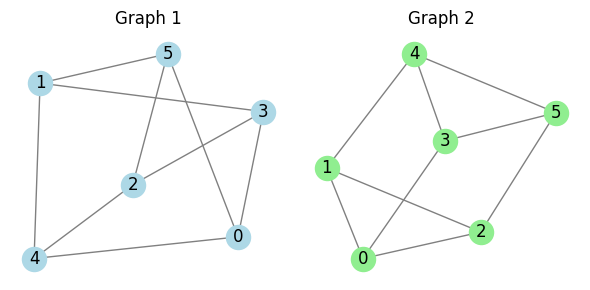

Graph 1 cycle: [(0, 3, 'forward'), (3, 1, 'forward'), (1, 4, 'forward'), (4, 0, 'forward')]
Graph 2 cycle: [(0, 1, 'forward'), (1, 2, 'forward'), (2, 0, 'forward')]


In [17]:
import networkx as nx
import numpy as np
# Create Graph 1 (using adjacency list)


def to_np(graph):
  return np.array(graph)

graphA = [
    [0, 0, 0, 1, 1, 1],
    [0, 0, 0, 1, 1, 1],
    [0, 0, 0, 1, 1, 1],
    [1, 1, 1, 0, 0, 0],
    [1, 1, 1, 0, 0, 0],
    [1, 1, 1, 0, 0, 0]
]

G1 = nx.Graph(nx.from_numpy_array(to_np(graphA)))  # Convert to NetworkX graph object

# Create Graph 2 (using adjacency list)
graphB =  [
    [0, 1, 1, 1, 0, 0],
    [1, 0, 1, 0, 1, 0],
    [1, 1, 0, 0, 0, 1],
    [1, 0, 0, 0, 1, 1],
    [0, 1, 0, 1, 0, 1],
    [0, 0, 1, 1, 1, 0]
]
G2 = nx.Graph(nx.from_numpy_array(to_np(graphB)))  # Convert to NetworkX graph object


# --- Check for Isomorphism (using NetworkX's built-in function) ---
print(f"Are the graphs isomorphic? {nx.is_isomorphic(G1, G2)}")  # This will output False

# --- Visualization (using NetworkX) ---
import matplotlib.pyplot as plt

# Draw Graph 1
plt.figure(figsize=(6, 3))  # Adjust figure size for better layout
plt.subplot(121)
plt.title("Graph 1")
nx.draw(G1, with_labels=True, node_color='lightblue', edge_color='gray')

# Draw Graph 2
plt.subplot(122)
plt.title("Graph 2")
nx.draw(G2, with_labels=True, node_color='lightgreen', edge_color='gray')

plt.tight_layout() # prevent label overlapping
plt.show()


# --- Cycle Detection (to show the 3-cycle difference) ---
try:
  cycle1 = nx.find_cycle(G1, orientation="ignore")
  print(f"Graph 1 cycle: {cycle1}") #will print a cycle
except nx.NetworkXNoCycle:
  print("Graph 1: No cycles found.")

try:
  cycle2 = nx.find_cycle(G2, orientation="ignore")
  print(f"Graph 2 cycle: {cycle2}") #will print a cycle
except nx.NetworkXNoCycle:
  print("Graph 2: No cycles found.")

The graphs are isomorphic.
Vertex Mapping:
Vertices with Multiple Identical Matches in Graph 2:
Vertex 0 in Graph 1 has multiple matches in Graph 2 at vertices [0, 1, 2, 3, 4, 5].
Vertex 1 in Graph 1 has multiple matches in Graph 2 at vertices [0, 1, 2, 3, 4, 5].
Vertex 2 in Graph 1 has multiple matches in Graph 2 at vertices [0, 1, 2, 3, 4, 5].
Vertex 3 in Graph 1 has multiple matches in Graph 2 at vertices [0, 1, 2, 3, 4, 5].
Vertex 4 in Graph 1 has multiple matches in Graph 2 at vertices [0, 1, 2, 3, 4, 5].
Vertex 5 in Graph 1 has multiple matches in Graph 2 at vertices [0, 1, 2, 3, 4, 5].


In [18]:
def isomorphic(graph1, graph2):
    # Check if the number of vertices in both graphs is the same
    if len(graph1) != len(graph2):
        return False, None

    # Function to calculate the sum of elements in a matrix
    def matrix_sum(matrix):
        return sum(sum(row) for row in matrix)

    # Calculate the sums of rows, columns, and diagonals for both graphs
    sum_rows1 = [sum(row) for row in graph1]
    sum_cols1 = [sum(graph1[i][j] for i in range(len(graph1))) for j in range(len(graph1))]
    diagonal_sum1 = sum(graph1[i][i] for i in range(len(graph1)))

    sum_rows2 = [sum(row) for row in graph2]
    sum_cols2 = [sum(graph2[i][j] for i in range(len(graph2))) for j in range(len(graph2))]
    diagonal_sum2 = sum(graph2[i][i] for i in range(len(graph2)))

    # Check if the sums match for both graphs
    if (
        sorted(sum_rows1) == sorted(sum_rows2) and
        sorted(sum_cols1) == sorted(sum_cols2) and
        diagonal_sum1 == diagonal_sum2
    ):
        # Now, find and map identical vertices, sorted by column values
        vertex_mapping = {}  # Dictionary to store mappings
        multiple_identical = {}  # Dictionary to store vertices with multiple identical matches
        unmatched_vertices = []  # List to store unmatched vertices

        for i in range(len(graph1)):
            # Sort the column values for graph1
            sorted_col1 = sorted([graph1[k][i] for k in range(len(graph1))])
            identical_matches = []  # List to store identical matches for the current vertex

            for j in range(len(graph2)):
                # Sort the column values for graph2
                sorted_col2 = sorted([graph2[k][j] for k in range(len(graph2))])
                if (
                    sum(graph1[i]) == sum(graph2[j]) and
                    sorted_col1 == sorted_col2
                ):
                    # Found an identical vertex
                    identical_matches.append(j)

            if len(identical_matches) > 1:
                # Vertex has multiple identical matches
                multiple_identical[i] = identical_matches
            elif len(identical_matches) == 1:
                # Vertex has a single identical match
                vertex_mapping[i] = identical_matches[0]
            else:
                # Vertex has no identical matches
                unmatched_vertices.append(i)

        if unmatched_vertices:
            # At least one vertex from graph1 cannot be mapped to graph2
            return False, None, None

        return True, vertex_mapping, multiple_identical

    return False, None, None

# Example graphs (adjacency matrices represented as lists of lists)
graph1 = [[0, 1, 1],
          [1, 0, 0],
          [1, 0, 0]]

graph2 = [[0, 1, 0],
          [1, 0, 1],
          [0, 1, 0]]

is_isomorphic, vertex_mapping, multiple_identical = isomorphic(graphA, graphB)

if is_isomorphic:
    print("The graphs are isomorphic.")
    print("Vertex Mapping:")
    for vertex1, vertex2 in vertex_mapping.items():
        print(f"Vertex {vertex1} in Graph 1 is identical to Vertex {vertex2} in Graph 2.")

    if multiple_identical:
        print("Vertices with Multiple Identical Matches in Graph 2:")
        for vertex, matches in multiple_identical.items():
            print(f"Vertex {vertex} in Graph 1 has multiple identical matches in Graph 2 at vertices {matches}.")
else:
    print("The graphs are not isomorphic.")


The graphs are isomorphic.
Vertex Mapping:
Vertices with Multiple Identical Matches in Graph 2:
Vertex 0 in Graph 1 has multiple identical matches in Graph 2 at vertices [0, 1, 2, 3, 4, 5].
Vertex 1 in Graph 1 has multiple identical matches in Graph 2 at vertices [0, 1, 2, 3, 4, 5].
Vertex 2 in Graph 1 has multiple identical matches in Graph 2 at vertices [0, 1, 2, 3, 4, 5].
Vertex 3 in Graph 1 has multiple identical matches in Graph 2 at vertices [0, 1, 2, 3, 4, 5].
Vertex 4 in Graph 1 has multiple identical matches in Graph 2 at vertices [0, 1, 2, 3, 4, 5].
Vertex 5 in Graph 1 has multiple identical matches in Graph 2 at vertices [0, 1, 2, 3, 4, 5].


In [23]:
import networkx as nx
import numpy as np

def isomorphic(graph1, graph2):
    """
    Checks if two graphs are isomorphic.  Handles NetworkX graphs,
    NumPy arrays, and lists of lists.

    Args:
        graph1: The first graph (NetworkX graph, NumPy array, or list of lists).
        graph2: The second graph (same format as graph1).

    Returns:
        A tuple: (is_isomorphic, mapping, multiple_candidates).
        - is_isomorphic: True if the graphs are isomorphic, False otherwise.
        - mapping: A dictionary mapping nodes of graph1 to nodes of graph2
                   if the graphs are isomorphic, or None otherwise. If there
                   are multiple possible mappings it gives one of them.
                   {} (empty dict) if there's an isomorphism but the graphs
                   have no nodes.
        - multiple_candidates: If is_isomorphic is True, this is a dictionary
                   where keys are nodes in graph1 and values are lists of
                   *potential* matching nodes in graph2 (nodes with the same
                   degree). This is useful for understanding *why* a match
                   was made, and for finding *all* isomorphisms (though this
                   function doesn't find all, just one).  If is_isomorphic is
                   False, this will be None.
    """

    # --- Input Handling and Conversion to NetworkX ---
    def to_networkx(graph):
        if isinstance(graph, nx.Graph):
            return graph
        elif isinstance(graph, np.ndarray):
            return nx.from_numpy_array(graph)
        elif isinstance(graph, list):
            return nx.from_numpy_array(np.array(graph))
        else:
            raise TypeError("Input must be a NetworkX graph, NumPy array, or list of lists.")

    G1 = to_networkx(graph1)
    G2 = to_networkx(graph2)

    # --- Fast Pre-checks (Necessary but not Sufficient) ---
    if G1.number_of_nodes() != G2.number_of_nodes():
        return False, None, None
    if G1.number_of_edges() != G2.number_of_edges():
        return False, None, None

    # Degree sequence check (still necessary but not sufficient)
    degree_seq1 = sorted([d for n, d in G1.degree()])
    degree_seq2 = sorted([d for n, d in G2.degree()])
    if degree_seq1 != degree_seq2:
        return False, None, None

    # --- VF2 Algorithm (using NetworkX's built-in matcher) ---
    graph_matcher = nx.isomorphism.GraphMatcher(G1, G2)
    is_iso = graph_matcher.is_isomorphic()

    if is_iso:
        mapping = graph_matcher.mapping

        # Find potential multiple candidates (for debugging/understanding)
        multiple_candidates = {}
        degree_map_g2 = {}  # {degree: [nodes]}
        for node, degree in G2.degree():
            degree_map_g2.setdefault(degree, []).append(node)

        for node1, degree1 in G1.degree():
            candidates = degree_map_g2.get(degree1, [])
            multiple_candidates[node1] = candidates
        
        # networkx uses 0-indexed nodes by default, so let's be
        # consistant in the output
        if isinstance(graph1, list) or isinstance(graph2, list) or \
           isinstance(graph1, np.ndarray) or isinstance(graph2, np.ndarray):
            pass # Keep mapping as-is (0-indexed).
        else:
            #If graphs have different node names, relabel
            # Create a mapping for the new index
            new_mapping = {}
            for key, val in mapping.items():
                new_mapping[key]= val
            mapping = new_mapping
    else:
        mapping = None
        multiple_candidates = None

    return is_iso, mapping, multiple_candidates
is_isomorphic, vertex_mapping, multiple_identical = isomorphic(graphA, graphB)

if is_isomorphic:
    print("The graphs are isomorphic.")
    print("Vertex Mapping:")
    for vertex1, vertex2 in vertex_mapping.items():
        print(f"Vertex {vertex1} in Graph 1 is identical to Vertex {vertex2} in Graph 2.")

    if multiple_identical:
        print("Vertices with Multiple Identical Matches in Graph 2:")
        for vertex, matches in multiple_identical.items():
            print(f"Vertex {vertex} in Graph 1 has multiple identical matches in Graph 2 at vertices {matches}.")
else:
    print("The graphs are not isomorphic.")

The graphs are not isomorphic.


In [24]:
def enhanced_isomorphic(graph1, graph2):
    n = len(graph1)
    # Check if the number of vertices in both graphs is the same
    if n != len(graph2):
        return False, None, None

    # Helper: compute row sums (degree of each vertex)
    degrees1 = [sum(row) for row in graph1]
    degrees2 = [sum(row) for row in graph2]

    # Basic invariants: row sums, column sums, and diagonal sum.
    sum_rows1 = degrees1
    sum_cols1 = [sum(graph1[i][j] for i in range(n)) for j in range(n)]
    diagonal_sum1 = sum(graph1[i][i] for i in range(n))

    sum_rows2 = degrees2
    sum_cols2 = [sum(graph2[i][j] for i in range(n)) for j in range(n)]
    diagonal_sum2 = sum(graph2[i][i] for i in range(n))

    if not (sorted(sum_rows1) == sorted(sum_rows2) and 
            sorted(sum_cols1) == sorted(sum_cols2) and 
            diagonal_sum1 == diagonal_sum2):
        return False, None, None

    # Compute neighbor signatures: for each vertex, get sorted list of neighbor degrees.
    def neighbor_signature(graph, degrees):
        signatures = []
        for i in range(n):
            # For each vertex i, look at neighbors where an edge exists.
            sig = sorted([degrees[j] for j in range(n) if graph[i][j] == 1])
            signatures.append(sig)
        return signatures

    neighbor_signatures1 = neighbor_signature(graph1, degrees1)
    neighbor_signatures2 = neighbor_signature(graph2, degrees2)

    # Now, find and map identical vertices using multiple invariants:
    # - Degree (row sum)
    # - Sorted column values (as before)
    # - Neighbor signature
    vertex_mapping = {}      # Unique mappings
    multiple_identical = {}  # For vertices with multiple identical matches
    unmatched_vertices = []  # Vertices that cannot be mapped

    for i in range(n):
        # Precompute sorted column for vertex i in graph1
        sorted_col1 = sorted([graph1[k][i] for k in range(n)])
        candidate_matches = []
        for j in range(n):
            # Precompute sorted column for vertex j in graph2
            sorted_col2 = sorted([graph2[k][j] for k in range(n)])
            if (degrees1[i] == degrees2[j] and 
                sorted_col1 == sorted_col2 and 
                neighbor_signatures1[i] == neighbor_signatures2[j]):
                candidate_matches.append(j)

        if len(candidate_matches) > 1:
            multiple_identical[i] = candidate_matches
        elif len(candidate_matches) == 1:
            vertex_mapping[i] = candidate_matches[0]
        else:
            unmatched_vertices.append(i)

    if unmatched_vertices:
        # At least one vertex in graph1 cannot be mapped to graph2 with the new invariant
        return False, None, None

    return True, vertex_mapping, multiple_identical

# Example graphs where the previous algorithm might mistakenly conclude isomorphism.
graphA = [
    [0, 0, 0, 1, 1, 1],
    [0, 0, 0, 1, 1, 1],
    [0, 0, 0, 1, 1, 1],
    [1, 1, 1, 0, 0, 0],
    [1, 1, 1, 0, 0, 0],
    [1, 1, 1, 0, 0, 0]
]

graphB = [
    [0, 1, 1, 1, 0, 0],
    [1, 0, 1, 0, 1, 0],
    [1, 1, 0, 0, 0, 1],
    [1, 0, 0, 0, 1, 1],
    [0, 1, 0, 1, 0, 1],
    [0, 0, 1, 1, 1, 0]
]

is_iso, mapping, multiple = enhanced_isomorphic(graphA, graphB)

if is_iso:
    print("The graphs are isomorphic.")
    print("Vertex Mapping:")
    for v1, v2 in mapping.items():
        print(f"Vertex {v1} in Graph 1 is identical to Vertex {v2} in Graph 2.")
    if multiple:
        print("Vertices with Multiple Identical Matches in Graph 2:")
        for v, matches in multiple.items():
            print(f"Vertex {v} in Graph 1 has multiple matches in Graph 2 at vertices {matches}.")
else:
    print("The graphs are not isomorphic.")


The graphs are isomorphic.
Vertex Mapping:
Vertices with Multiple Identical Matches in Graph 2:
Vertex 0 in Graph 1 has multiple matches in Graph 2 at vertices [0, 1, 2, 3, 4, 5].
Vertex 1 in Graph 1 has multiple matches in Graph 2 at vertices [0, 1, 2, 3, 4, 5].
Vertex 2 in Graph 1 has multiple matches in Graph 2 at vertices [0, 1, 2, 3, 4, 5].
Vertex 3 in Graph 1 has multiple matches in Graph 2 at vertices [0, 1, 2, 3, 4, 5].
Vertex 4 in Graph 1 has multiple matches in Graph 2 at vertices [0, 1, 2, 3, 4, 5].
Vertex 5 in Graph 1 has multiple matches in Graph 2 at vertices [0, 1, 2, 3, 4, 5].


In [26]:
def backtracking_isomorphic(graph1, graph2):
    n = len(graph1)
    # Quick check: both graphs must have the same number of vertices.
    if n != len(graph2):
        return False, None

    # Compute vertex degrees for both graphs.
    degrees1 = [sum(row) for row in graph1]
    degrees2 = [sum(row) for row in graph2]
    if sorted(degrees1) != sorted(degrees2):
        return False, None

    # Compute neighbor signatures: for each vertex, the sorted list of the degrees of its neighbors.
    def neighbor_signature(graph, degrees):
        signatures = []
        for i in range(n):
            sig = sorted([degrees[j] for j in range(n) if graph[i][j] == 1])
            signatures.append(sig)
        return signatures

    neighbor_signatures1 = neighbor_signature(graph1, degrees1)
    neighbor_signatures2 = neighbor_signature(graph2, degrees2)

    # Compute sorted column invariants for additional filtering.
    col_invariants1 = [sorted([graph1[k][i] for k in range(n)]) for i in range(n)]
    col_invariants2 = [sorted([graph2[k][i] for k in range(n)]) for i in range(n)]

    # Build candidate lists for each vertex in graph1: list of vertices in graph2 with matching invariants.
    candidates = {}
    for i in range(n):
        candidates[i] = []
        for j in range(n):
            if (degrees1[i] == degrees2[j] and
                col_invariants1[i] == col_invariants2[j] and
                neighbor_signatures1[i] == neighbor_signatures2[j]):
                candidates[i].append(j)
        if not candidates[i]:
            # No candidates for vertex i means graphs cannot be isomorphic.
            return False, None

    # Backtracking search: try to build a full isomorphism mapping.
    mapping = {}   # mapping from vertex in graph1 to vertex in graph2
    used = set()   # keep track of already-mapped vertices in graph2

    def backtrack():
        if len(mapping) == n:
            return True  # Found a complete mapping.
        # Choose an unmapped vertex from graph1 with the smallest candidate list (heuristic for efficiency).
        unmapped = [i for i in range(n) if i not in mapping]
        unmapped.sort(key=lambda x: len(candidates[x]))
        v = unmapped[0]

        for j in candidates[v]:
            if j in used:
                continue
            # Check consistency: For every already mapped vertex u, the edge relation must be preserved.
            consistent = True
            for u in mapping:
                if graph1[u][v] != graph2[mapping[u]][j] or graph1[v][u] != graph2[j][mapping[u]]:
                    consistent = False
                    break
            if not consistent:
                continue

            # Extend the mapping and try to complete recursively.
            mapping[v] = j
            used.add(j)
            if backtrack():
                return True
            # Backtrack: remove the tentative assignment.
            del mapping[v]
            used.remove(j)
        return False

    if backtrack():
        return True, mapping
    return False, None

# Example usage:
# Define two graphs (as adjacency matrices) that are isomorphic.
graph1 = [
    [0, 1, 1, 0],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [0, 1, 1, 0]
]

graph2 = [
    [0, 1, 0, 1],
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [1, 0, 1, 0]
]

is_iso, mapping = backtracking_isomorphic(graphA, graphB)
if is_iso:
    print("The graphs are isomorphic.")
    print("Vertex Mapping:")
    for v1, v2 in mapping.items():
        print(f"Vertex {v1} in Graph 1 -> Vertex {v2} in Graph 2")
else:
    print("The graphs are not isomorphic.")


The graphs are not isomorphic.
